# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Data Overview

In [3]:
print('Rows in Dataset:', df.shape[0])
print('Columns in Dataset:', df.shape[1])

Rows in Dataset: 1000
Columns in Dataset: 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Observation about the Dataset:
- Has 11 Columns
- Has 1000 Rows
- Data has six object Dtype and others are int and float
- Has null data in several columns (`Daily Time Spent on Site`, `Area Income `, `Daily Internet Usage`, `Male`)
- `Unamed` column will be drop later and `Male` column's name will be change to Gender
- `Timestamp` dtypes should not be object. Probably will be change to datetime or the columns will be drop.
- `Clicked on Ad` column is target or label (should be change to numerical type)

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
#Dividing numerical and categorical type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_type = df.select_dtypes(include = num_dtypes)
categorical_type = df.select_dtypes(include = 'object')

nums = numerical_type.columns
cats = categorical_type.columns

print('Numerical Columns:', nums)
print('=========================')
print('=========================')
print('Categorical Columns:', cats)

Numerical Columns: Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')
Categorical Columns: Index(['Male', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')


## Statistical Summary

In [7]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [8]:
df[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [9]:
for col in cats:
    print('Column', col, ':')
    print(df[col].value_counts())
    print(' ')

Column Male :
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
 
Column Clicked on Ad :
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
 
Column city :
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64
 
Column province :
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                  

# EDA

## Univariate Analysis

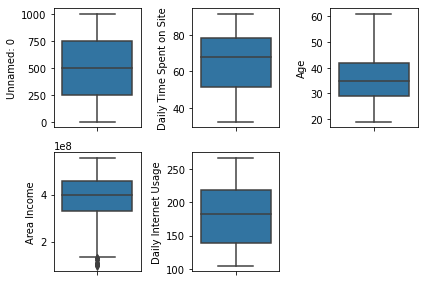

In [10]:
#plt.figure(figsize = (10, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y = df[nums[i]], orient = 'v')
    plt.tight_layout()

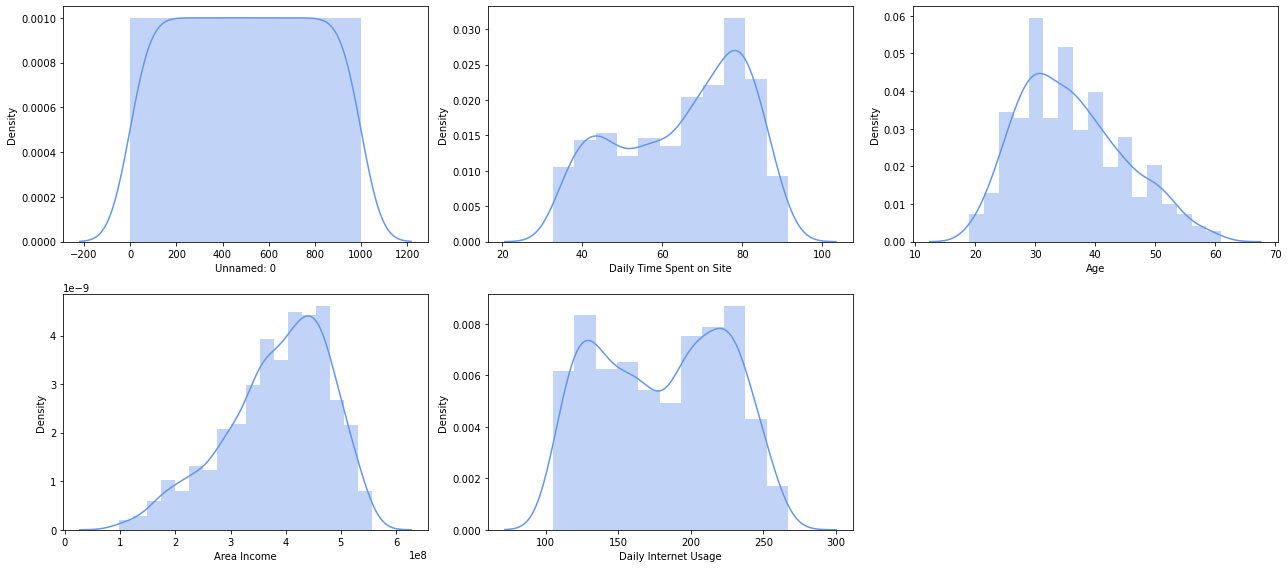

In [11]:
plt.figure(figsize = (18, 8))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i + 1)
    sns.distplot(df[nums[i]], color = 'cornflowerblue')
    plt.tight_layout()

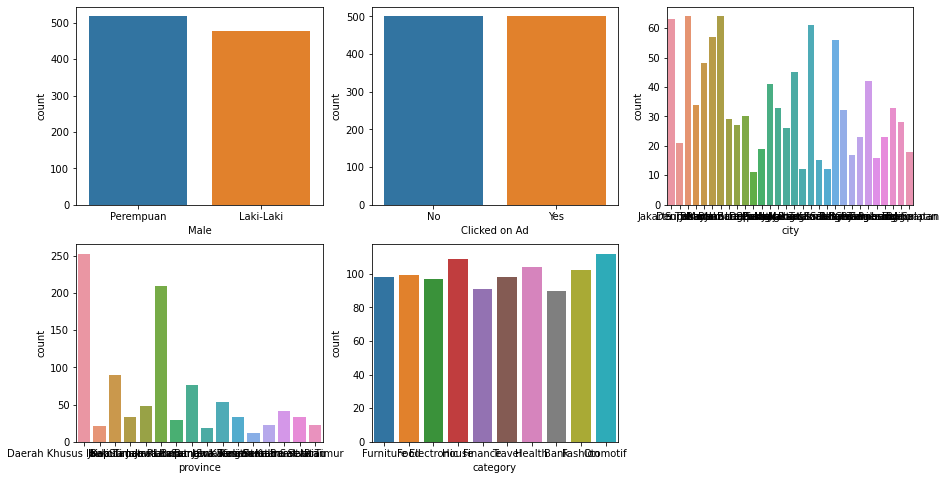

In [12]:
plt.figure(figsize = (15, 8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = df[cats[i]])

## Total Clicked on Ads with Age

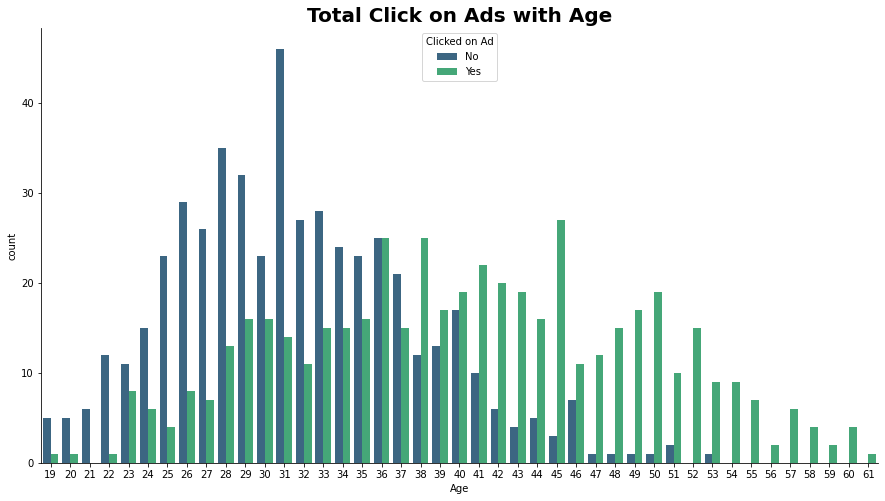

In [13]:
plt.figure(figsize = (15, 8))
sns.countplot('Age', data = df, palette = 'viridis',hue = 'Clicked on Ad')
plt.title('Total Click on Ads with Age', weight = 'bold', size = 20)
sns.despine()

## Total Clicked Ads with Daily Internet Usage

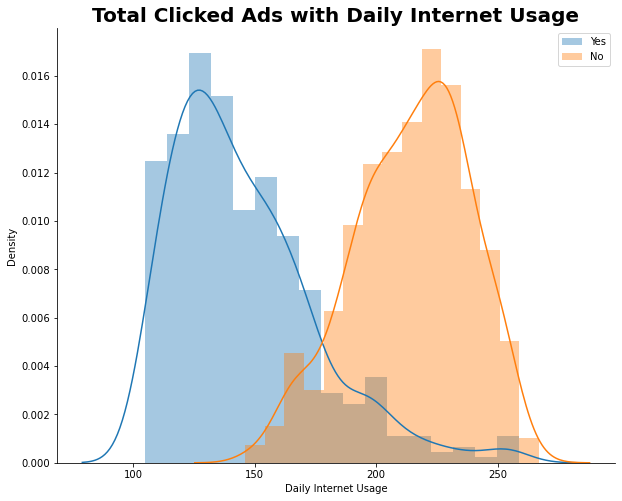

In [14]:
plt.figure(figsize = (10, 8))

y = df.loc[df['Clicked on Ad'] == 'Yes']
n = df.loc[df['Clicked on Ad'] == 'No']

sns.distplot(y['Daily Internet Usage'], label = 'Yes')
sns.distplot(n['Daily Internet Usage'], label ='No')

plt.title('Total Clicked Ads with Daily Internet Usage', weight = 'bold', size = 20)
sns.despine()
plt.legend();

## Total Clicked Ads with Daily Time Spent on Site

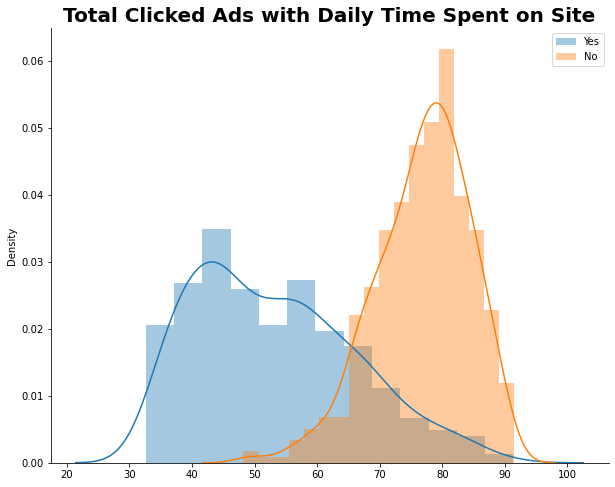

In [15]:
plt.figure(figsize = (10, 8))

y = df.loc[df['Clicked on Ad'] == 'Yes']
n = df.loc[df['Clicked on Ad'] == 'No']

sns.distplot(x = y['Daily Time Spent on Site'], label = 'Yes')
sns.distplot(x = n['Daily Time Spent on Site'], label = 'No')

plt.title('Total Clicked Ads with Daily Time Spent on Site', weight = 'bold', size = 20)
sns.despine()
plt.legend();

## Heatmap Correlation

<AxesSubplot:>

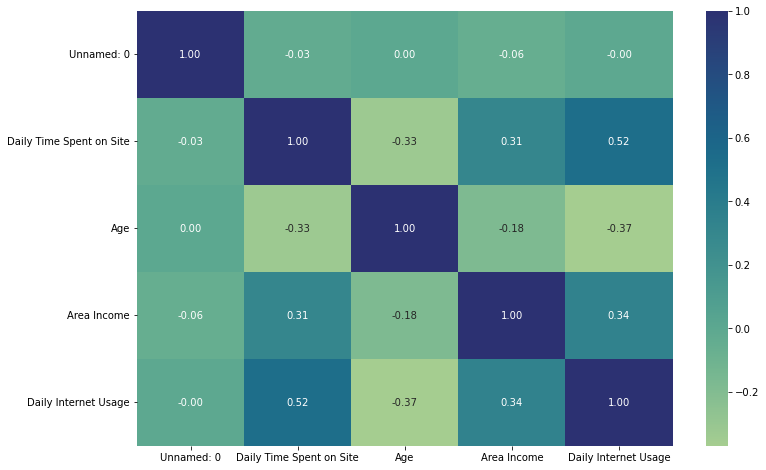

In [22]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'crest')

# Pre Processing

In [16]:
# check null values

# mv = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ']

# for i in df.columns:
#     dmy_col = df[i].apply(lambda x : str(x).strip())
#     isnan = dmy_col.isin(mv).any()
#     miss = np.unique(dmy_col.loc[dmy_col.isin(mv)])
#     if isnan == True:
#         print('{} = {} - {}'.format(i, isnan, miss))